In [1]:
import pandas as pd
s=pd.Series([1,2,3,4,54,5])
print(s)

0     1
1     2
2     3
3     4
4    54
5     5
dtype: int64


In [2]:
medical_charges_url= 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x2087fbffd90>)

In [5]:
import pandas as pd

In [6]:
medical_df=pd.read_csv('medical.csv')

In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
!pip install jovian


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import jovian

C:\Users\SUREKHA\PyCharmMiscProject\.venv\Lib\site-packages\jovian\utils\latest.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


<IPython.core.display.Javascript object>

In [12]:
!pip install plotly matplotlib seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [16]:
fig=px.histogram(medical_df,x="age",nbins=50,marginal='box',title="Distribution of Age")
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig=px.histogram(medical_df,x='bmi',nbins=50,marginal='box',color_discrete_sequence=['red'],title="Distribution of BMI")
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig=px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],title="Distribution of Charges")
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
 medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [20]:
px.histogram(medical_df,x='smoker',color='sex',title='Distribution of Smoker')

In [21]:
fig=px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [22]:
fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [23]:
px.violin(medical_df,x='children',y='charges')

In [24]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [25]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [26]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [27]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [28]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

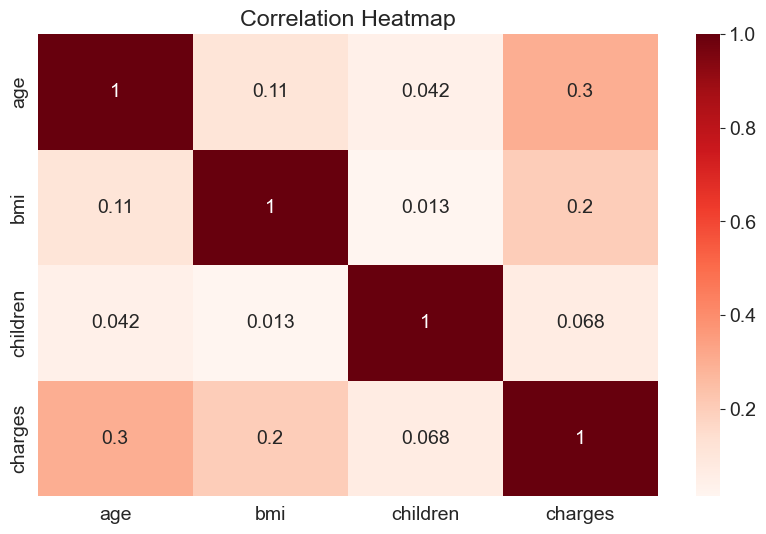

In [29]:
sns.heatmap(medical_df.select_dtypes('number').corr(),annot=True,cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

In [30]:
non_smoker_df=medical_df[medical_df.smoker=='no']

<Axes: title={'center': 'Age vs charges'}, xlabel='age', ylabel='charges'>

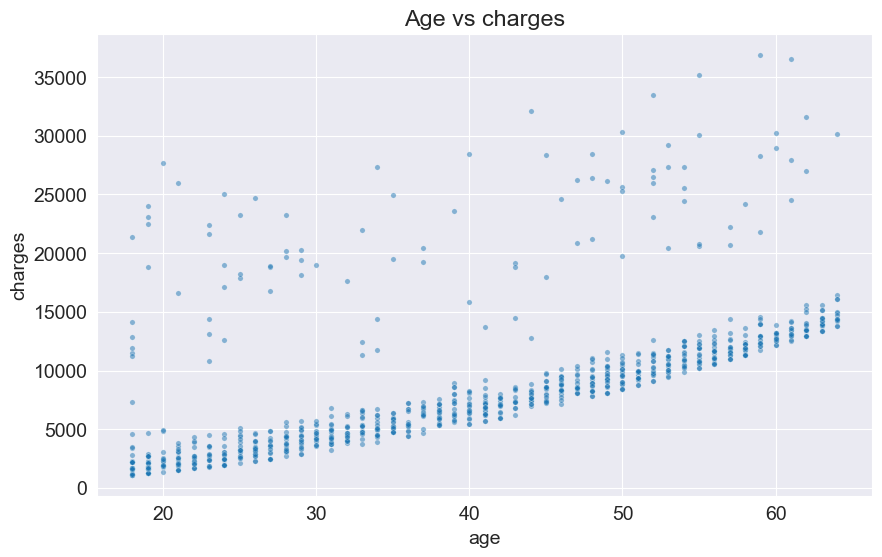

In [31]:
plt.title("Age vs charges")
sns.scatterplot(non_smoker_df,x='age',y='charges',alpha=0.5,s=15)

In [32]:
def estimate_charges(age,w,a):
    return w*age+b

In [33]:
w=50
b=100

In [34]:
ages=non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [35]:
estimated_charge=estimate_charges(ages,w,b)
estimated_charge

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [36]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'estimated charge')

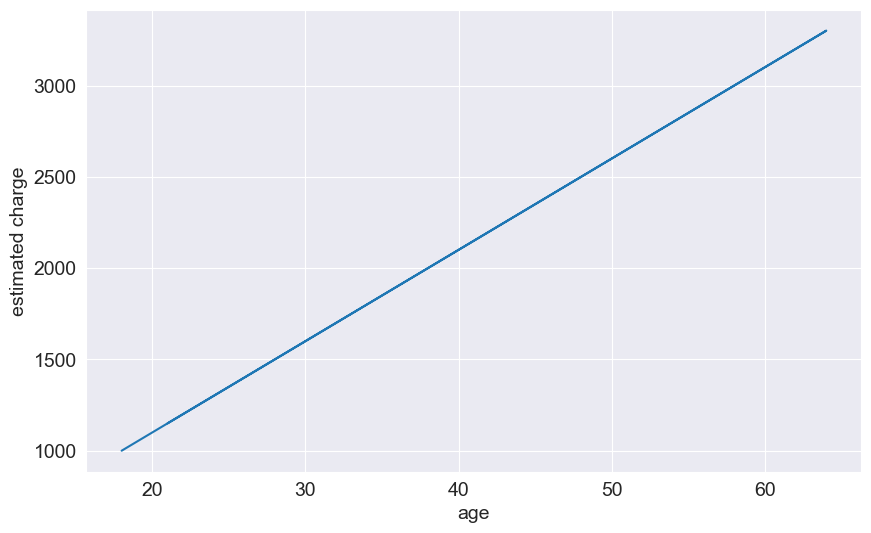

In [37]:
plt.plot(ages,estimated_charge)
plt.xlabel('age')
plt.ylabel('estimated charge')

C:\Users\SUREKHA\AppData\Local\Temp\ipykernel_13724\4178858888.py:6: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries



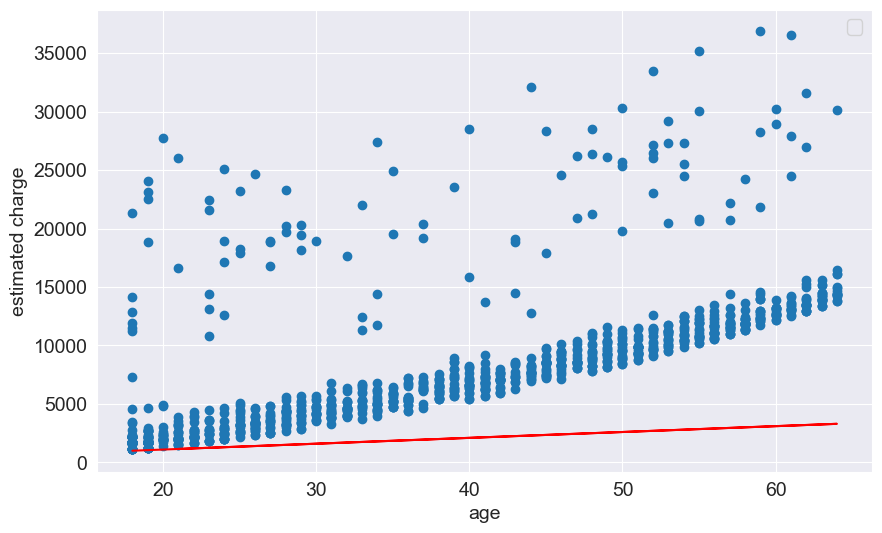

In [38]:
target=non_smoker_df.charges
plt.plot(ages,estimated_charge,'r')
plt.scatter(ages,target)
plt.xlabel('age')
plt.ylabel('estimated charge')
plt.legend(['Estimate'],['Actual'])

In [39]:
def try_parameter(w,b):
    ages=non_smoker_df.age
    target=non_smoker_df.charges
    estimated_charge=estimate_charges(ages,w,b)
    plt.plot(ages,estimated_charge,'r')
    plt.scatter(ages,target)
    plt.xlabel('age')
    plt.ylabel('estimated charge')

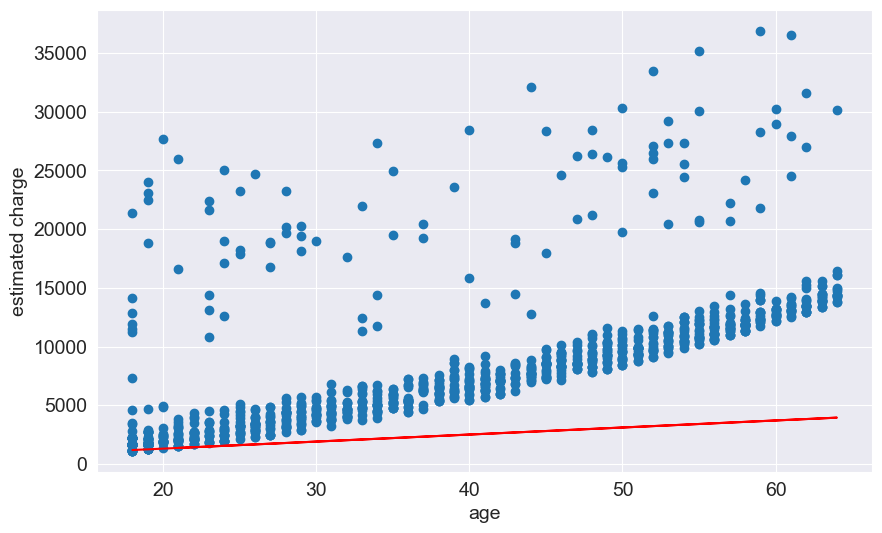

In [40]:
try_parameter(60,200)

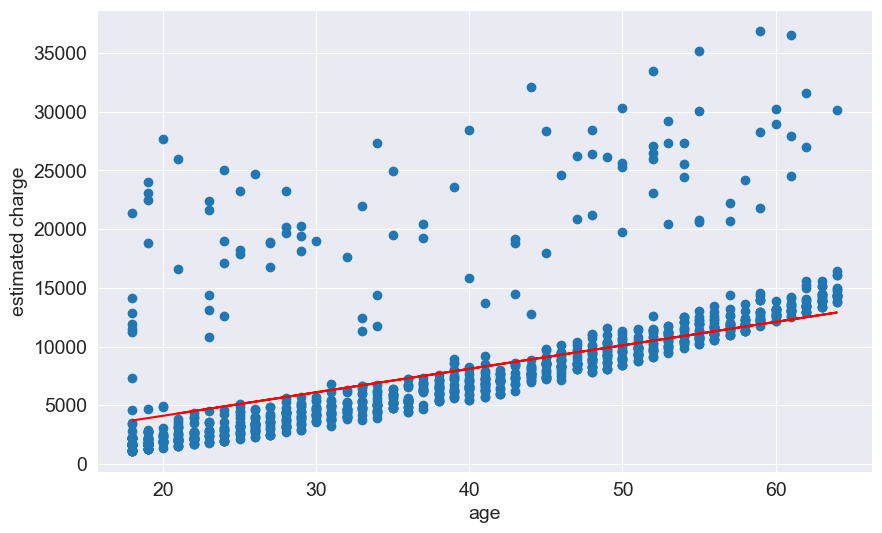

In [41]:
try_parameter(200,-4000)

In [42]:
targets=non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [43]:
prediction = estimated_charge
prediction

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [44]:
import numpy as np

In [45]:
def rmse(predicted, targets):
    return np.sqrt(np.mean(np.square(targets - predicted)))

In [46]:
w=50
b=100

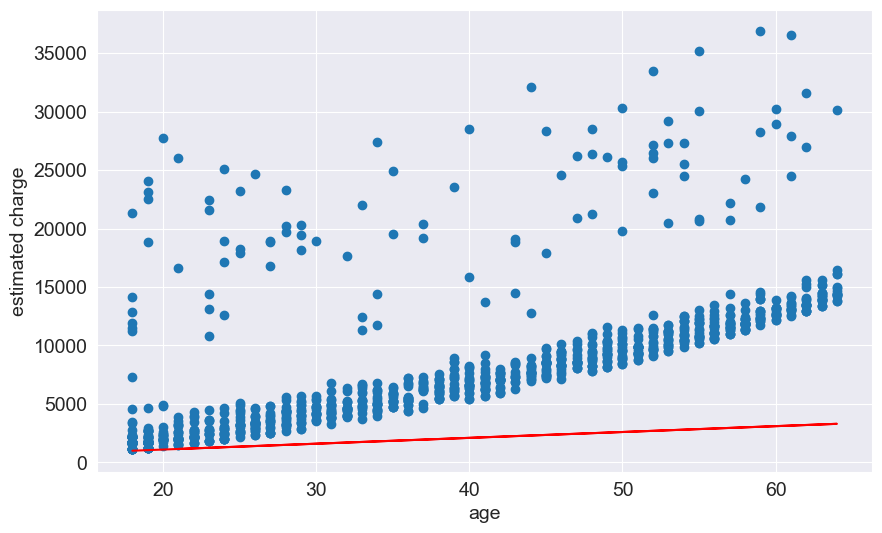

In [47]:
try_parameter(w, b)

In [48]:
def est_crg(age,w,b):
    return w*age+b
targets=non_smoker_df.charges
predicted=est_crg(non_smoker_df.age,w,b)

In [49]:
rmse(targets,predicted)

np.float64(8461.949562575493)

In [50]:
def try_parameter(w,b):
    ages=non_smoker_df.age
    target=non_smoker_df.charges
    predictions=estimate_charges(ages,w,b)
    plt.plot(ages,predictions,'r')
    plt.scatter(ages,target)
    plt.xlabel('age')
    plt.ylabel('charge')

    loss=rmse(targets,predictions)
    print("RMSE loss=",loss)

RMSE loss= 7266.699605113179


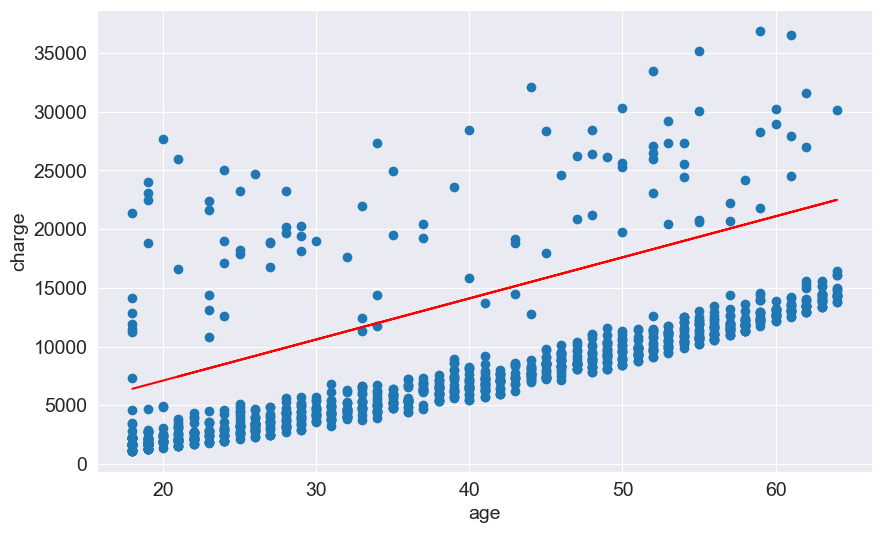

In [51]:
try_parameter(350,-4000)

In [52]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model=LinearRegression()

In [55]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [56]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print('inputs shape=',inputs.shape)
print("targets shape=",targets.shape)

inputs shape= (1064, 1)
targets shape= (1064,)


In [57]:
model.fit(inputs,targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\SUREKHA\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [59]:
model.predict(inputs)

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [60]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [61]:
rmse(targets,prediction)

np.float64(8461.949562575493)

In [62]:
model.coef_

array([267.24891283])

In [63]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE loss= 5151.823374267957


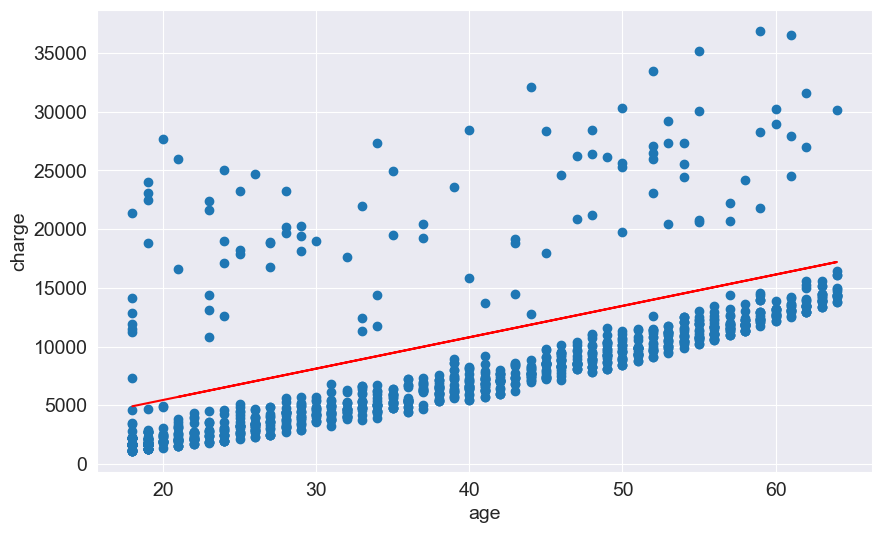

In [64]:
try_parameter(model.coef_,model.intercept_)

In [65]:
inputs, targets=non_smoker_df[['age','bmi','children']], non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(predictions,targets)
print("Loss=",loss)

Loss= 4608.470405038246


In [66]:
smoker_df=medical_df[medical_df.smoker=='yes']

In [67]:
inputs, targets=medical_df[['age','bmi','children']], medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(predictions,targets)
print("Loss=",loss)

Loss= 11355.317901125973


In [68]:
smoker_codes={'no':0,'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_codes)

In [69]:
inputs, targets=medical_df[['age','bmi','children','smoker_code']], medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(predictions,targets)
print("Loss=",loss)

Loss= 6056.439217188081


In [70]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [76]:
 one_hot=enc.transform(medical_df[['region']]).toarray()
 one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [73]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

In [74]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [77]:
inputs, targets=medical_df[['age','bmi','children','smoker_code','northeast','northwest','southeast','southwest']], medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(predictions,targets)
print("Loss=",loss)

Loss= 6042.033215394104


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
numeric_cols=['age','bmi','children']
scaler=StandardScaler();
scaler.fit(medical_df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [80]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [81]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [82]:
scaled_inputs=scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [84]:
cat_col=['smoker_code','northeast','northwest','southeast','southwest']
categorical_data=medical_df[cat_col].values